In [51]:
!pip install openpyxl

In [52]:
import pandas as pd
from matplotlib import pyplot as plt
import os

In [53]:
import time
stime = time.time()

In [54]:
!wget https://archive.ics.uci.edu/static/public/352/online+retail.zip

--2025-02-23 18:51:23--  https://archive.ics.uci.edu/static/public/352/online+retail.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+retail.zip.1’

online+retail.zip.1     [       <=>          ]  22.62M  2.84MB/s    in 8.2s    

2025-02-23 18:51:35 (2.76 MB/s) - ‘online+retail.zip.1’ saved [23715478]



In [55]:
!unzip online+retail.zip

Archive:  online+retail.zip
replace Online Retail.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: Online Retail.xlsx      


In [56]:
df1 = pd.read_excel("Online Retail.xlsx", dtype={'InvoiceNo': 'string', 'StockCode': 'string', 'Description': 'string', 'Country': 'string'})
df1 = pd.concat([df1]*60)
df1.shape

(32514540, 8)

In [57]:
df1.shape

(32514540, 8)

In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32514540 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Dtype         
---  ------       -----         
 0   InvoiceNo    string        
 1   StockCode    string        
 2   Description  string        
 3   Quantity     int64         
 4   InvoiceDate  datetime64[ns]
 5   UnitPrice    float64       
 6   CustomerID   float64       
 7   Country      string        
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 2.2 GB


#### DATA CLEANING : Handle any missing values if any

In [59]:
df1.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,87240
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,8104800
Country,0


In [60]:
df1[df1.Description.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,<NA>,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,<NA>,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,<NA>,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,<NA>,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [61]:
df1[df1.StockCode == "22139"]  ##So for same stockcode with missing description we have other with description

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
106,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,2010-12-01 09:41:00,4.25,15311.0,United Kingdom
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.00,NaN,United Kingdom
6885,536982,22139,RETROSPOT TEA SET CERAMIC 11 PC,10,2010-12-03 14:27:00,11.02,NaN,United Kingdom
7203,537011,22139,<NA>,-5,2010-12-03 15:38:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
538411,581405,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 13:50:00,4.95,13521.0,United Kingdom
539531,581439,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 16:30:00,10.79,NaN,United Kingdom
540441,581486,22139,RETROSPOT TEA SET CERAMIC 11 PC,6,2011-12-09 09:38:00,4.95,17001.0,United Kingdom
541387,581498,22139,RETROSPOT TEA SET CERAMIC 11 PC,2,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [62]:
df1[df1.StockCode == "22139"].Description.mode()          #Using the most used value

,Description
0,RETROSPOT TEA SET CERAMIC 11 PC


In [63]:
most_freq = df1[["StockCode","Description"]].value_counts().reset_index()
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,138120
1,22423,REGENCY CAKESTAND 3 TIER,132000
2,85099B,JUMBO BAG RED RETROSPOT,129540
3,47566,PARTY BUNTING,103620
4,20725,LUNCH BAG RED RETROSPOT,98280
...,...,...,...
4787,35833P,check,60
4788,21410,COUNTRY COTTAGE DOORSTOP GREEN,60
4789,21412,VINTAGE GOLD TINSEL REEL,60
4790,21414,SCALLOP SHELL SOAP DISH,60


In [64]:
most_freq[most_freq.StockCode == "85123A"].head(1)

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,138120


In [65]:
most_freq = most_freq.groupby("StockCode").head(1)
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,138120
1,22423,REGENCY CAKESTAND 3 TIER,132000
2,85099B,JUMBO BAG RED RETROSPOT,129540
3,47566,PARTY BUNTING,103620
4,20725,LUNCH BAG RED RETROSPOT,98280
...,...,...,...
4784,35832,WOOLLY HAT SOCK GLOVE ADVENT STRING,60
4785,35833G,4 GOLD FLOCK CHRISTMAS BALLS,60
4788,21410,COUNTRY COTTAGE DOORSTOP GREEN,60
4789,21412,VINTAGE GOLD TINSEL REEL,60


In [66]:
most_freq.columns = ["StockCode", "freq_Description","count"]

df2 = df1.merge(most_freq, on="StockCode", how="left")
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,138120.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,19680.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,17580.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,28380.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,26940.0


In [67]:
df2['Description'] = df2['freq_Description']
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,138120.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,19680.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,17580.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,28380.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,26940.0


In [68]:
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,6720
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,8104800
Country,0
freq_Description,6720
count,6720


In [69]:
df2.dropna(subset = ["Description"],inplace=True)
df2.isnull().sum() ##Customer_ID won't affect much in our retail Process

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,8098080
Country,0
freq_Description,0
count,0


In [70]:
df2.drop(columns=["freq_Description","count"],inplace=True)
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [71]:
df2.describe()   ##Handle -ve values

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,3.250782e+07,32507820,3.250782e+07,2.440974e+07
mean,9.555919e+00,2011-07-04 14:06:48.671256832,4.612067e+00,1.528769e+04
min,-8.099500e+04,2010-12-01 08:26:00,-1.106206e+04,1.234600e+04
25%,1.000000e+00,2011-03-28 11:36:00,1.250000e+00,1.395300e+04
50%,3.000000e+00,2011-07-20 08:59:00,2.080000e+00,1.515200e+04
75%,1.000000e+01,2011-10-19 11:41:00,4.130000e+00,1.679100e+04
max,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,1.828700e+04
std,2.181032e+02,NaN,9.676974e+01,1.713598e+03


In [72]:
df2[df2.Quantity<0]  #Quantity can't be -ve

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
32513080,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
32514172,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
32514346,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
32514347,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [73]:
df2[df2.UnitPrice<0]   #Unit Price can't be negetive

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom
841892,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
841893,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom
1383801,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
31188797,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom
31730705,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
31730706,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom
32272614,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom


In [74]:
df3 = df2[(df2.UnitPrice>0) & (df2.Quantity>0)]
df3.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,3.180624e+07,31806240,3.180624e+07,2.387304e+07
mean,1.054204e+01,2011-07-04 20:16:05.225086720,3.907625e+00,1.529442e+04
min,1.000000e+00,2010-12-01 08:26:00,1.000000e-03,1.234600e+04
25%,1.000000e+00,2011-03-28 12:22:00,1.250000e+00,1.396900e+04
50%,3.000000e+00,2011-07-20 12:58:00,2.080000e+00,1.515900e+04
75%,1.000000e+01,2011-10-19 12:39:00,4.130000e+00,1.679500e+04
max,8.099500e+04,2011-12-09 12:50:00,1.354133e+04,1.828700e+04
std,1.555240e+02,NaN,3.591565e+01,1.713139e+03


In [75]:
df3.Quantity.quantile(0.9999)

1440.0

In [76]:
df3[df3.Quantity>1500]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4850,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom
25920,538420,17096,ASSORTED LAQUERED INCENSE HOLDERS,1728,2010-12-12 12:03:00,0.17,12875.0,United Kingdom
32671,539101,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2010-12-16 10:35:00,0.94,16029.0,United Kingdom
52709,540815,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2011-01-11 12:55:00,2.55,15749.0,United Kingdom
...,...,...,...,...,...,...,...,...
32410111,574294,21915,RED HARMONICA IN BOX,2100,2011-11-03 15:47:00,1.06,16333.0,United Kingdom
32419666,574941,22197,POPCORN HOLDER,1820,2011-11-07 17:42:00,1.95,NaN,United Kingdom
32463133,578060,M,Manual,1600,2011-11-22 15:22:00,0.25,17857.0,United Kingdom
32484052,579498,23084,RABBIT NIGHT LIGHT,2040,2011-11-29 15:52:00,1.79,12798.0,Japan


Feature Engineering : Create New Columns

In [77]:
df4 = df3.copy()
df4['TotalSales'] = df4.Quantity * df4.UnitPrice
df4.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00


## Trend Analysis

In [78]:
df4['Month'] = df4["InvoiceDate"].dt.month
df4.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month
19931097,573078,22212,FOUR HOOK WHITE LOVEBIRDS,6,2011-10-27 14:13:00,2.10,12839.0,United Kingdom,12.60,10
10250528,578344,22556,PLASTERS IN TIN CIRCUS PARADE,2,2011-11-24 09:21:00,3.29,NaN,United Kingdom,6.58,11
18756608,566025,22498,WOODEN REGATTA BUNTING,1,2011-09-08 12:55:00,5.95,17634.0,United Kingdom,5.95,9
3875287,543182,22219,LOVEBIRD HANGING DECORATION WHITE,1,2011-02-04 10:40:00,1.63,NaN,United Kingdom,1.63,2
9381270,551142,35965,FOLKART HEART NAPKIN RINGS,6,2011-04-26 13:22:00,0.79,17613.0,United Kingdom,4.74,4


## Visualization and EDA

1. Plot Monthly Sales


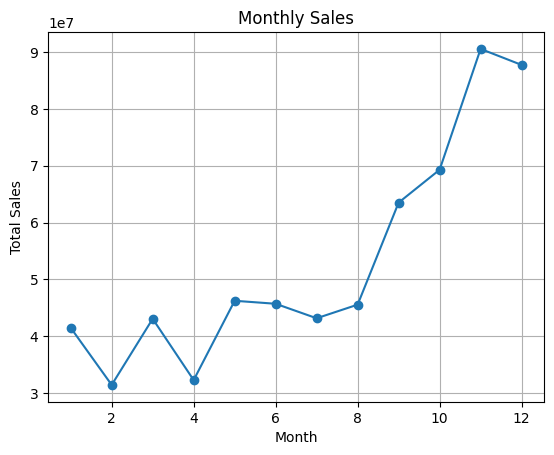

In [79]:
monthly_sales = df4.groupby("Month")["TotalSales"].sum()
monthly_sales.plot(kind="line" , title = "Monthly Sales", marker ="o")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid()

**Insights**
Total Sales started rising up in August having a peek in November. Might be because of Holiday season in year end.

2. Top 5 Countries

In [80]:
# prompt: plot horizontal bar chart for top 5 countries by total sales

top_5_countries = df4.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(5)
top_5_countries

,TotalSales
Country,
United Kingdom,5.415133e+08
Netherlands,1.712678e+07
EIRE,1.700724e+07
Germany,1.373203e+07
France,1.258291e+07


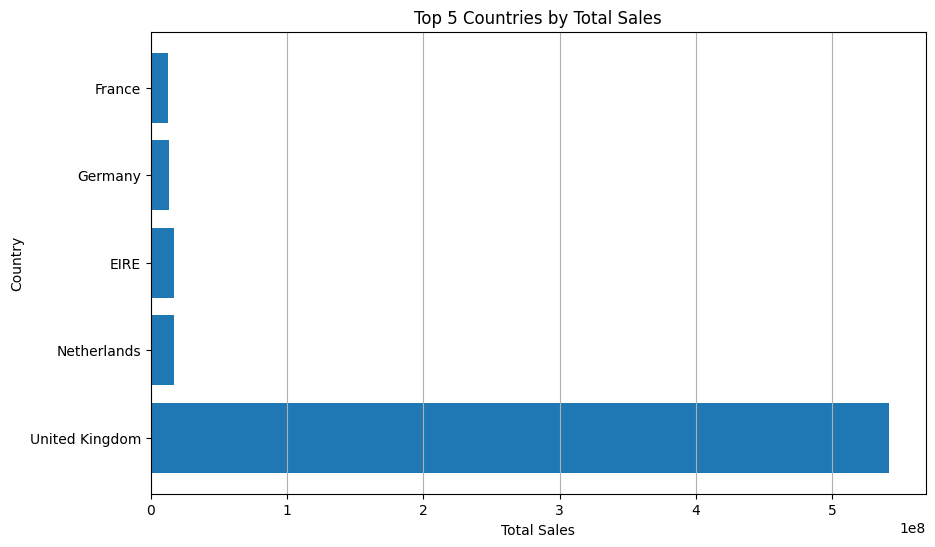

In [81]:
plt.figure(figsize=(10, 6))
plt.barh(top_5_countries.index, top_5_countries.values)
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.title('Top 5 Countries by Total Sales')
plt.grid(axis='x')
plt.show()

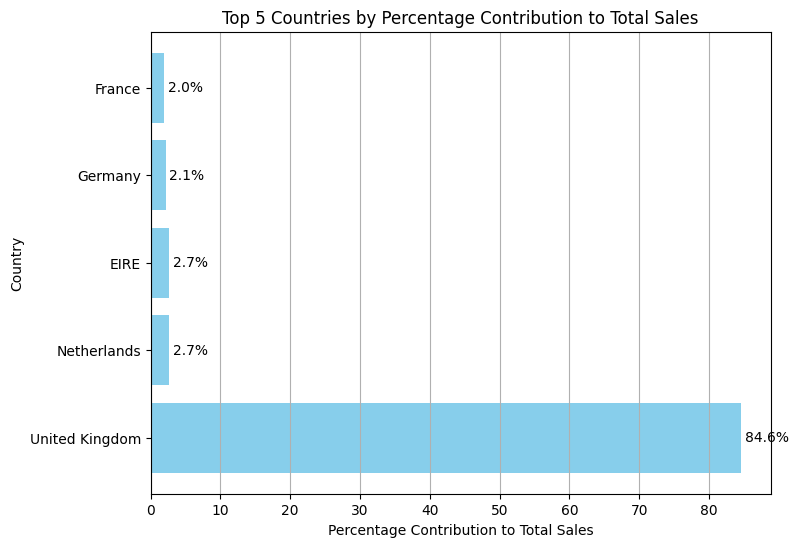

In [82]:
country_wise_sales = df4.groupby('Country')['TotalSales'].sum()

top_5_countries = country_wise_sales.nlargest(5)

total_sales = country_wise_sales.sum()
percentages = (top_5_countries / total_sales) * 100

# Plot
plt.figure(figsize=(8, 6))
bars = plt.barh(top_5_countries.index, percentages, color='skyblue')
plt.xlabel('Percentage Contribution to Total Sales')
plt.ylabel('Country')
plt.title('Top 5 Countries by Percentage Contribution to Total Sales')
plt.grid(axis='x')

# Add percentage labels to the bars
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{percentage:.1f}%', va='center')

plt.show()

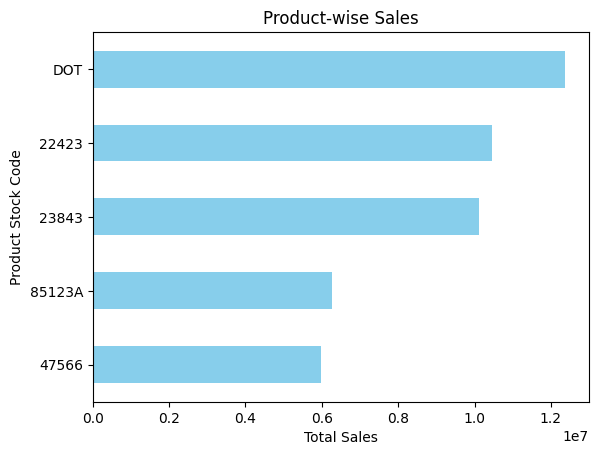

In [83]:
product_wise_sales = df4.groupby('StockCode')['TotalSales'].sum()
top_5_products = product_wise_sales.sort_values(ascending=False).head(5)
top_5_products.plot(kind='barh', color='skyblue')
plt.title('Product-wise Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Stock Code')
plt.gca().invert_yaxis()
plt.show()

In [84]:
product_wise_sales.sort_values(ascending=False)

,TotalSales
StockCode,
DOT,12374926.20
22423,10469084.40
23843,10108176.00
85123A,6271128.00
47566,5970259.80
...,...
90084,51.00
21268,50.40
51014c,49.80


In [85]:
product_wise_sales.sum()

640001072.6400001

In [86]:
df4[df4.StockCode == 'DOT' ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month
1814,536544,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,NaN,United Kingdom,569.77,12
3041,536592,DOT,DOTCOM POSTAGE,1,2010-12-01 17:06:00,607.49,NaN,United Kingdom,607.49,12
5450,536862,DOT,DOTCOM POSTAGE,1,2010-12-03 11:13:00,254.43,NaN,United Kingdom,254.43,12
5545,536864,DOT,DOTCOM POSTAGE,1,2010-12-03 11:27:00,121.06,NaN,United Kingdom,121.06,12
5685,536865,DOT,DOTCOM POSTAGE,1,2010-12-03 11:28:00,498.47,NaN,United Kingdom,498.47,12
...,...,...,...,...,...,...,...,...,...,...
32509465,581219,DOT,DOTCOM POSTAGE,1,2011-12-08 09:28:00,1008.96,NaN,United Kingdom,1008.96,12
32509885,581238,DOT,DOTCOM POSTAGE,1,2011-12-08 10:53:00,1683.75,NaN,United Kingdom,1683.75,12
32511999,581439,DOT,DOTCOM POSTAGE,1,2011-12-08 16:30:00,938.59,NaN,United Kingdom,938.59,12
32513539,581492,DOT,DOTCOM POSTAGE,1,2011-12-09 10:03:00,933.17,NaN,United Kingdom,933.17,12


In [87]:
for stock_code in top_5_products.index:
    description = df4[df4.StockCode==stock_code].Description.iloc[0]
    print(f"{stock_code} ==> {description}")

DOT ==> DOTCOM POSTAGE
22423 ==> REGENCY CAKESTAND 3 TIER
23843 ==> PAPER CRAFT , LITTLE BIRDIE
85123A ==> WHITE HANGING HEART T-LIGHT HOLDER
47566 ==> PARTY BUNTING


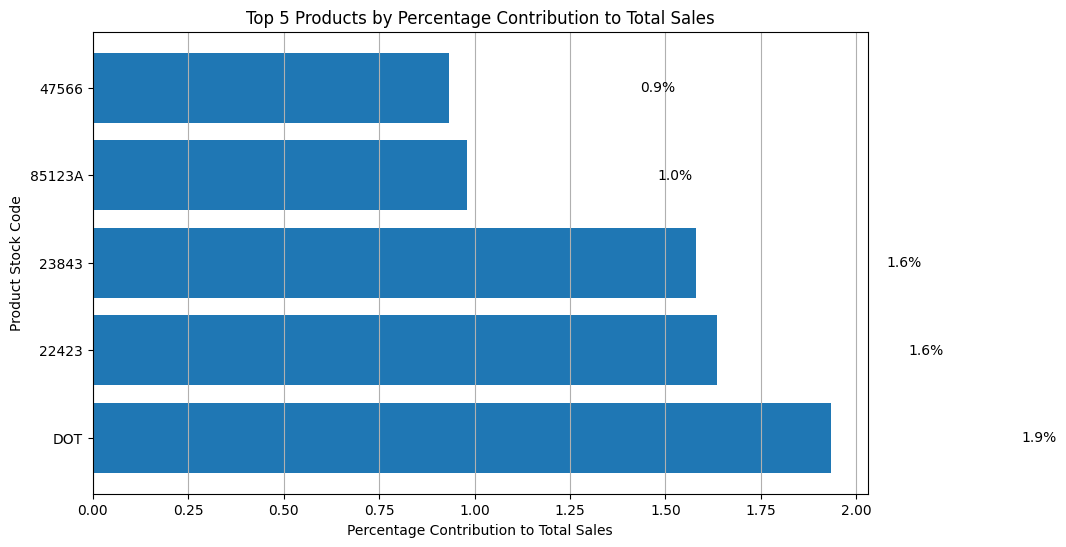

In [88]:
# Plot same chart as above for product sales but use percentage this time. Show % on the bar
# Assuming df4 is already created from the previous code
total_sales = product_wise_sales.sum()
percentages = (top_5_products / total_sales) * 100

plt.figure(figsize=(10, 6))
bars = plt.barh(top_5_products.index, percentages)
plt.xlabel('Percentage Contribution to Total Sales')
plt.ylabel('Product Stock Code')
plt.title('Top 5 Products by Percentage Contribution to Total Sales')
plt.grid(axis='x')

# Add percentage labels to the bars
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{percentage:.1f}%', va='center')

plt.show()

### 4. RFM Analysis

In [89]:
curr_date = df4['InvoiceDate'].max() + pd.Timedelta(days=1)
curr_date

Timestamp('2011-12-10 12:50:00')

In [90]:
rfm = df4.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (curr_date - x.max()).days,  #Recent value for each customer
    "InvoiceNo": "count",
    "TotalSales": "sum"
})

rfm.columns = ["Recency","Frequency","Monetary"]
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,60,4631016.0
12347.0,2,10920,258600.0
12348.0,75,1860,107834.4
12349.0,19,4380,105453.0
12350.0,310,1020,20064.0


In [91]:
# Segment Customers based on RFM
rfm['R_Segment'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_Segment'] = pd.qcut(rfm['Frequency'], 4, labels=[1, 2, 3, 4])
rfm['M_Segment'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])
rfm['RFM_Score'] = rfm[['R_Segment', 'F_Segment', 'M_Segment']].sum(axis=1)
rfm

,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score
CustomerID,,,,,,,
12346.0,326,60,4631016.0,1,1,4,6
12347.0,2,10920,258600.0,4,4,4,12
12348.0,75,1860,107834.4,2,2,4,8
12349.0,19,4380,105453.0,3,3,4,10
12350.0,310,1020,20064.0,1,1,2,4
...,...,...,...,...,...,...,...
18280.0,278,600,10836.0,1,1,1,3
18281.0,181,420,4849.2,1,1,1,3
18282.0,8,720,10683.0,4,1,1,6


In [92]:
#Customers with highest RFM Scores
rfm.sort_values('RFM_Score', ascending=False)

,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score
CustomerID,,,,,,,
18198.0,4,9540,325533.6,4,4,4,12
18210.0,2,8040,157282.8,4,4,4,12
18225.0,3,16260,330547.2,4,4,4,12
18283.0,4,45360,125692.8,4,4,4,12
16983.0,13,8880,115875.0,4,4,4,12
...,...,...,...,...,...,...,...
12402.0,323,660,13536.0,1,1,1,3
18185.0,249,1020,18255.0,1,1,1,3
18190.0,192,900,17067.6,1,1,1,3


5. Customer Churn Analysis


In [93]:
df4.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12


In [94]:
# Create a basket matrix for association rule mining
customer_last_purchase = df4.groupby("CustomerID")['InvoiceDate'].max()
customer_last_purchase.head(5)

,InvoiceDate
CustomerID,
12346.0,2011-01-18 10:01:00
12347.0,2011-12-07 15:52:00
12348.0,2011-09-25 13:13:00
12349.0,2011-11-21 09:51:00
12350.0,2011-02-02 16:01:00


In [95]:
type(customer_last_purchase)

pandas.core.series.Series

In [96]:
curr_date

Timestamp('2011-12-10 12:50:00')

In [97]:
customer_last_purchase = (curr_date - customer_last_purchase).dt.days
customer_last_purchase.head()

,InvoiceDate
CustomerID,
12346.0,326
12347.0,2
12348.0,75
12349.0,19
12350.0,310


In [98]:
#Define Churn threshold (e.g. x days without purchase)

churn_threshold = 90
churned_customers = customer_last_purchase[customer_last_purchase > churn_threshold]
churned_customers.head()

,InvoiceDate
CustomerID,
12346.0,326
12350.0,310
12353.0,204
12354.0,232
12355.0,214


Number of Churned Customers: 1449


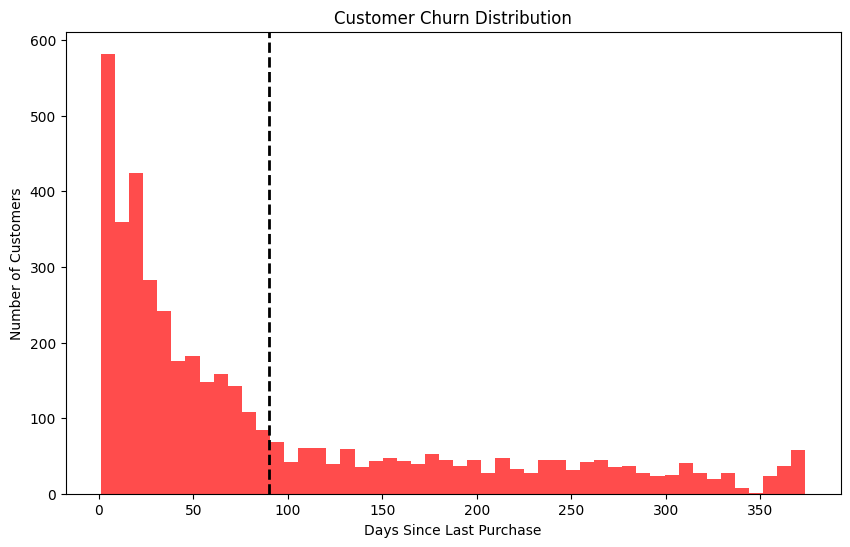

In [99]:
print("Number of Churned Customers:", len(churned_customers))
plt.figure(figsize=(10, 6))
plt.hist(customer_last_purchase, bins=50, color='red', alpha=0.7)
plt.axvline(churn_threshold, color='black', linestyle='dashed', linewidth=2)
plt.title('Customer Churn Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')
plt.show()

In [100]:
print(f"[{pd.__name__}] total time taken: {time.time() - stime} sec")

[pandas] total time taken: 198.04341864585876 sec
